<a href="https://colab.research.google.com/github/Felipeosouz/Formacao-Cientista-de-Dados/blob/main/Machine%20Learning/Neural%20Networks%20e%20Deep%20Learning/Soybean_DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils

base = pd.read_csv("soybean.csv")
base.head()

,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,germination,plant-growth,leaves,leafspots-halo,leafspots-marg,leafspot-size,leaf-shread,leaf-malf,leaf-mild,stem,lodging,stem-cankers,canker-lesion,fruiting-bodies,external-decay,mycelium,int-discolor,sclerotia,fruit-pods,fruit-spots,seed,mold-growth,seed-discolor,seed-size,shriveling,roots,class
0,october,normal,gt-norm,norm,yes,same-lst-yr,low-areas,pot-severe,none,90-100,abnorm,abnorm,absent,dna,dna,absent,absent,absent,abnorm,no,above-sec-nde,brown,present,firm-and-dry,absent,none,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
1,august,normal,gt-norm,norm,yes,same-lst-two-yrs,scattered,severe,fungicide,80-89,abnorm,abnorm,absent,dna,dna,absent,absent,absent,abnorm,yes,above-sec-nde,brown,present,firm-and-dry,absent,none,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
2,july,normal,gt-norm,norm,yes,same-lst-yr,scattered,severe,fungicide,lt-80,abnorm,abnorm,absent,dna,dna,absent,absent,absent,abnorm,yes,above-sec-nde,dna,present,firm-and-dry,absent,none,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
3,july,normal,gt-norm,norm,yes,same-lst-yr,scattered,severe,none,80-89,abnorm,abnorm,absent,dna,dna,absent,absent,absent,abnorm,yes,above-sec-nde,dna,present,firm-and-dry,absent,none,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
4,october,normal,gt-norm,norm,yes,same-lst-two-yrs,scattered,pot-severe,none,lt-80,abnorm,abnorm,absent,dna,dna,absent,absent,absent,abnorm,yes,above-sec-nde,brown,present,firm-and-dry,absent,none,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker


In [21]:
X = base.iloc[:, 0:35].values
y = base.iloc[:, 35].values

labelencoder = LabelEncoder()

for x in range(35):
  X[:, x] = labelencoder.fit_transform(X[:, x])
y[:] = labelencoder.fit_transform(y[:])

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, train_size = 0.3, random_state = 0)

X_treino = X_treino.astype("float32")
X_teste = X_teste.astype("float32")

y_treino = np_utils.to_categorical(y_treino, 19)
y_teste = np_utils.to_categorical(y_teste, 19)
y_treino

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [22]:
modelo = Sequential()
modelo.add(Dense(units = 166, activation = "relu", input_dim = 35))
modelo.add(Dropout(0.2))
modelo.add(Dense(units = 166, activation = "relu"))
modelo.add(Dropout(0.2))
modelo.add(Dense(units = 166, activation = "relu"))
modelo.add(Dropout(0.2))
modelo.add(Dense(units = 166, activation = "relu"))
modelo.add(Dropout(0.2))
modelo.add(Dense(units = 19, activation = "softmax"))
modelo.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])
modelo.fit(X_treino, y_treino, epochs = 200, validation_data = (X_teste, y_teste))

Epoch 1/200
7/7 [==============================] - 2s 42ms/step - loss: 2.8605 - accuracy: 0.1324 - val_loss: 2.6156 - val_accuracy: 0.2965
Epoch 2/200
7/7 [==============================] - 0s 13ms/step - loss: 2.5670 - accuracy: 0.1765 - val_loss: 2.4951 - val_accuracy: 0.3090
Epoch 3/200
7/7 [==============================] - 0s 19ms/step - loss: 2.3241 - accuracy: 0.3578 - val_loss: 2.3448 - val_accuracy: 0.3653
Epoch 4/200
7/7 [==============================] - 0s 19ms/step - loss: 2.2226 - accuracy: 0.3137 - val_loss: 2.1848 - val_accuracy: 0.4175
Epoch 5/200
7/7 [==============================] - 0s 13ms/step - loss: 2.0738 - accuracy: 0.3235 - val_loss: 2.0150 - val_accuracy: 0.3758
Epoch 6/200
7/7 [==============================] - 0s 12ms/step - loss: 1.8856 - accuracy: 0.4216 - val_loss: 1.8936 - val_accuracy: 0.4572
Epoch 7/200
7/7 [==============================] - 0s 15ms/step - loss: 1.7778 - accuracy: 0.4608 - val_loss: 1.7735 - val_accuracy: 0.5282
Epoch 8/200
7/7 [===

In [23]:
previsoes = modelo.predict(X_teste)
previsoes = (previsoes > 0.5)
previsoes

15/15 [==============================] - 0s 2ms/step


array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

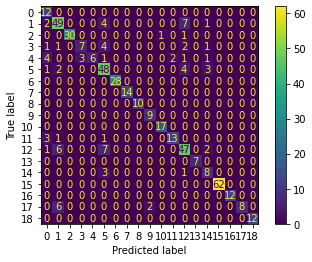

In [24]:
previsoes_matrix = [np.argmax(t) for t in previsoes]
y_matrix = [np.argmax(t) for t in y_teste]

confusao = confusion_matrix(y_matrix, previsoes_matrix)
disp = ConfusionMatrixDisplay(confusion_matrix = confusao)
disp.plot()

In [25]:
taxa_acerto = accuracy_score(y_matrix, previsoes_matrix)
taxa_acerto

0.8329853862212944